In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import jdatetime
import re
import tqdm
from tqdm import tqdm
from urlextract import URLExtract
import emojis
import hazm
from hazm import *
import nltk
from wordcloud_fa import WordCloudFa
import arabic_reshaper
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from collections import Counter
from nltk.util import ngrams

In [2]:
df = pd.read_json(r'data/PP-data.json')
df.head()

,dict_id,date,text,persian_year,persian_month,persian_day,hour,day_of_week,PP_text,length,num_tokens,lemma_text,stem_text
0,4,2023-03-09 01:37:38,امروز؛ سحرگاه ۱۸ام اسفندماه، فرزند دومم متولد شد.,1401,12,18,1,Thursday,امروز ؛ سحرگاه ۱۸ ام اسفندماه فرزند دومم متولد,48,10,امروز سحرگاه ۱۸ ام اسفندماه فرزند دوم متولد,امروز سحرگاه ۱۸ ا اسفندماه فرزند دوم متولد
1,7,2023-03-09 02:11:02,من کیستم؟\n\nمبر ز موی سپیدم گمان به عمر دراز\...,1401,12,18,2,Thursday,کیستم مبر ز موی سپیدم گمان عمر درازجوان ز حادث...,189,36,کیستم مبر ز مو سپید گمان عمر درازجوان ز حادث پ...,کیس مبر ز مو سپید گ عمر درازجو ز حادث پیر میشو...
2,8,2023-03-09 02:20:06,['شاید به دردتان خورد:\n\nبداهه یا حرف\u200cها...,1401,12,18,2,Thursday,دردتان خورد بداهه حرفهای روزمره ຯپسرام °• •°هی...,298,54,درد خورد بداهه حرف روزمره ຯپسرام هیونگی گرگ এل...,درد خورد بداهه حرف روزمره ຯپسرا هیونگ گرگ এلحظ...
3,9,2023-03-09 16:00:14,سلام بر راه، که جدایی و وصال همگان از اوست!,1401,12,18,16,Thursday,سلام جدایی وصال همگان اوست,42,10,سلام جدایی وصال همگان اوست,سلا جدا وصال همگ اوس
4,10,2023-03-09 17:54:51,این دفعه، زمان بیشتری رو توی تاریکی می‌گذرونیم.,1401,12,18,17,Thursday,دفعه زمان توی تاریکی میگذرونیم,45,8,دفعه زمان تو تاریکی میگذرونیم,دفعه ز تو تاریک میگذرون


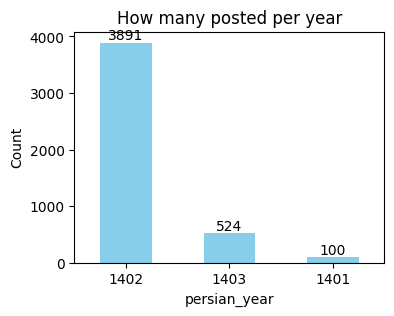

In [3]:
value_counts = df['persian_year'].value_counts()
plt.figure(figsize=(4, 3))
ax =  value_counts.plot(kind='bar', color='skyblue')
plt.title('How many posted per year')
plt.xlabel('persian_year')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.05, str(i.get_height()), ha='center', va='bottom')
plt.show()

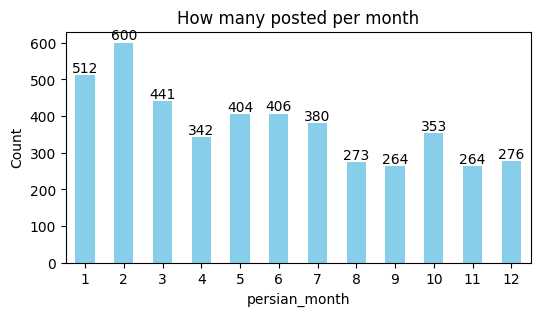

In [4]:
value_counts = df['persian_month'].value_counts().sort_index()
plt.figure(figsize=(6, 3))
ax =  value_counts.plot(kind='bar', color='skyblue')
plt.title('How many posted per month')
plt.xlabel('persian_month')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.05, str(i.get_height()), ha='center', va='bottom')
plt.show()

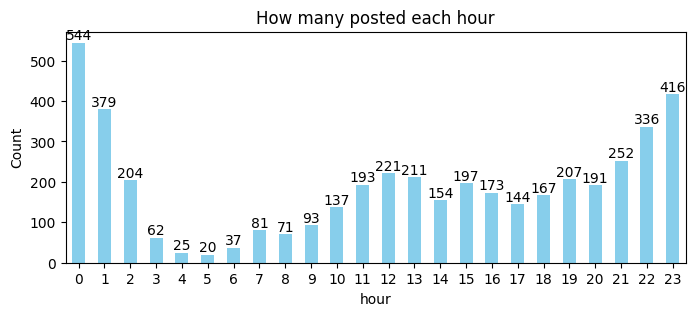

In [5]:
value_counts = df['hour'].value_counts().sort_index()
plt.figure(figsize=(8, 3))
ax =  value_counts.plot(kind='bar', color='skyblue')
plt.title('How many posted each hour')
plt.xlabel('hour')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.05, str(i.get_height()), ha='center', va='bottom')
plt.show()

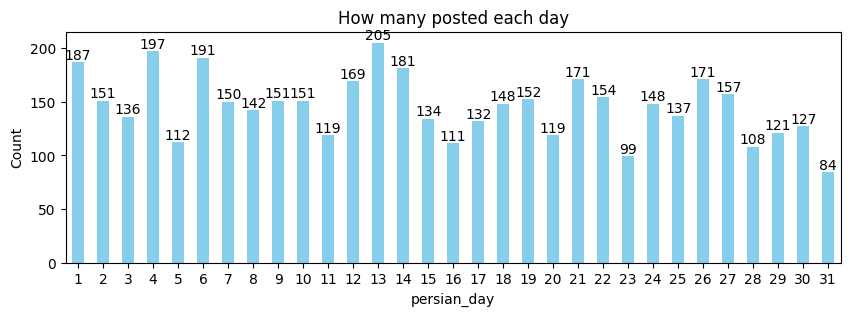

In [6]:
value_counts = df['persian_day'].value_counts().sort_index()
plt.figure(figsize=(10, 3))
ax =  value_counts.plot(kind='bar', color='skyblue')
plt.title('How many posted each day')
plt.xlabel('persian_day')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.05, str(i.get_height()), ha='center', va='bottom')
plt.show()

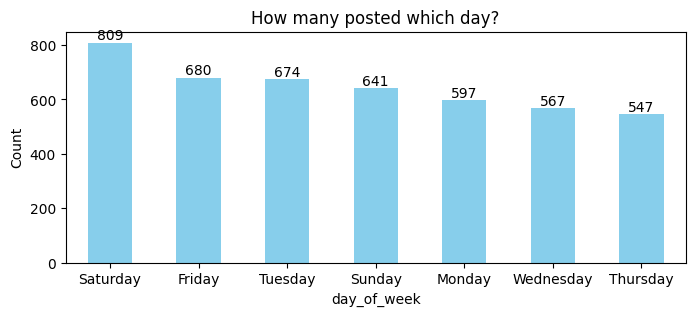

In [7]:
value_counts = df['day_of_week'].value_counts()
plt.figure(figsize=(8, 3))
ax =  value_counts.plot(kind='bar', color='skyblue')
plt.title('How many posted which day?')
plt.xlabel('day_of_week')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.05, str(i.get_height()), ha='center', va='bottom')
plt.show()

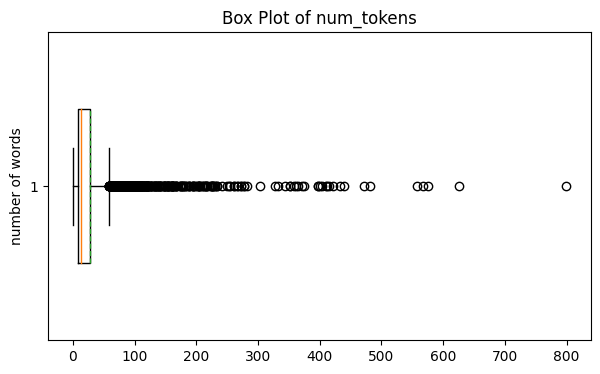

In [8]:
plt.figure(figsize=(7, 4))
plt.boxplot(df['num_tokens'], vert=False, widths = 0.5, showmeans = True, meanline = True)
plt.title('Box Plot of num_tokens')
plt.ylabel('number of words')
plt.show()

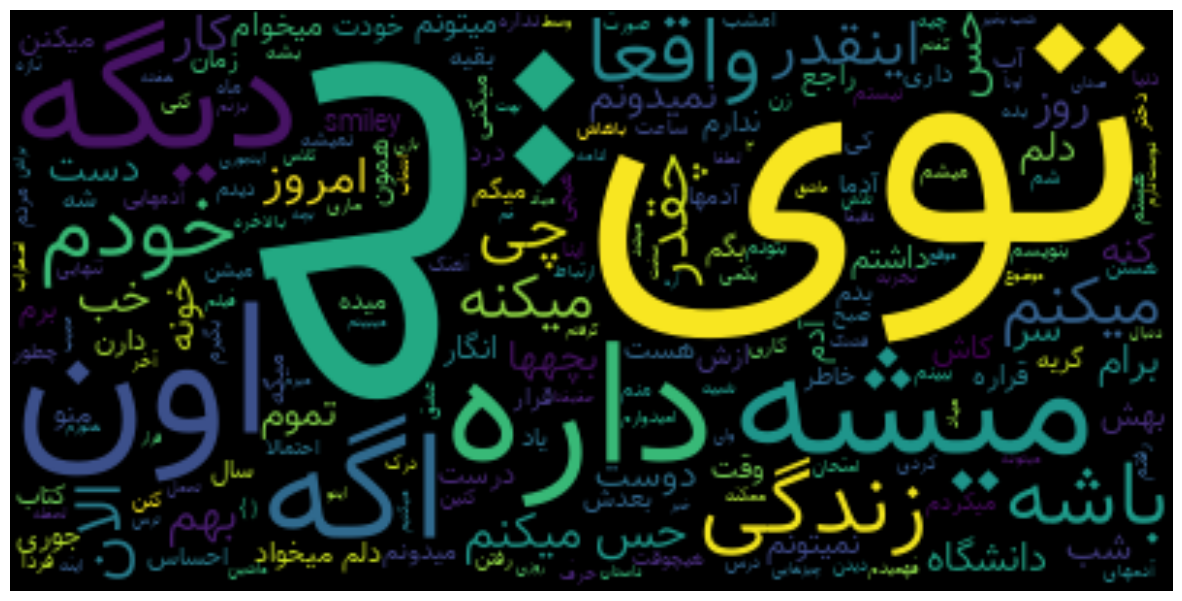

In [9]:
text = ' '.join(df['PP_text'].astype(str))
wc = WordCloudFa()
word_cloud = wc.generate(text)
image = word_cloud.to_image()
plt.figure(figsize=(15, 12))
plt.imshow(image, interpolation='bilinear')
plt.axis("off")
plt.show()

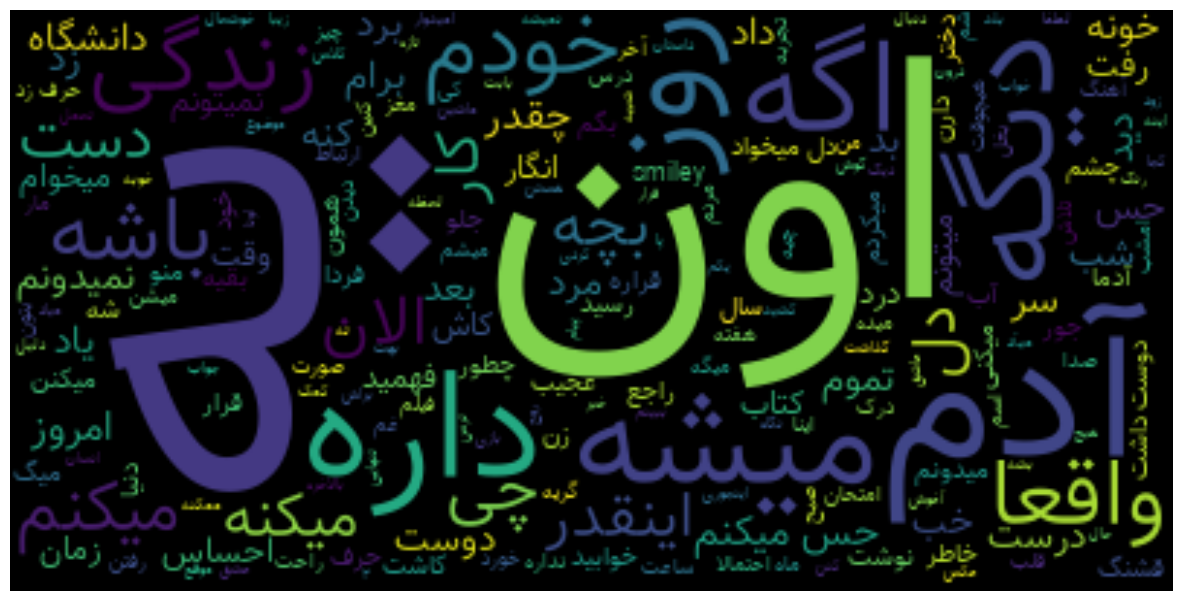

In [10]:
text = ' '.join(df['lemma_text'].astype(str))
wc = WordCloudFa()
word_cloud = wc.generate(text)
image = word_cloud.to_image()
plt.figure(figsize=(15, 12))
plt.imshow(image, interpolation='bilinear')
plt.axis("off")
plt.show()

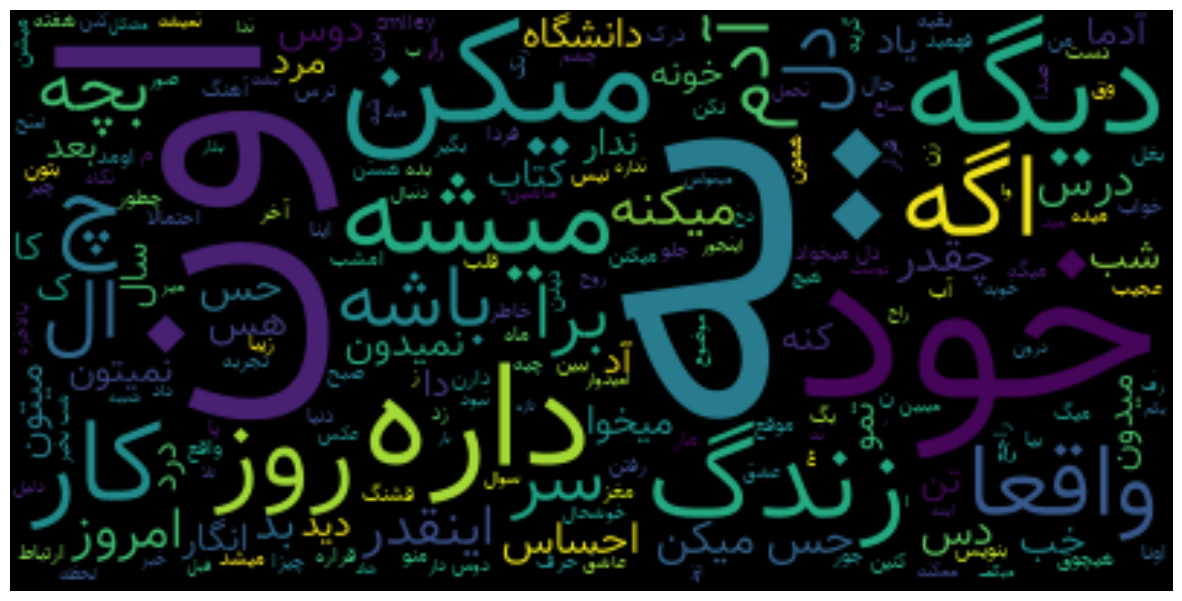

In [11]:
text = ' '.join(df['stem_text'].astype(str))
wc = WordCloudFa()
word_cloud = wc.generate(text)
image = word_cloud.to_image()
plt.figure(figsize=(15, 12))
plt.imshow(image, interpolation='bilinear')
plt.axis("off")
plt.show()

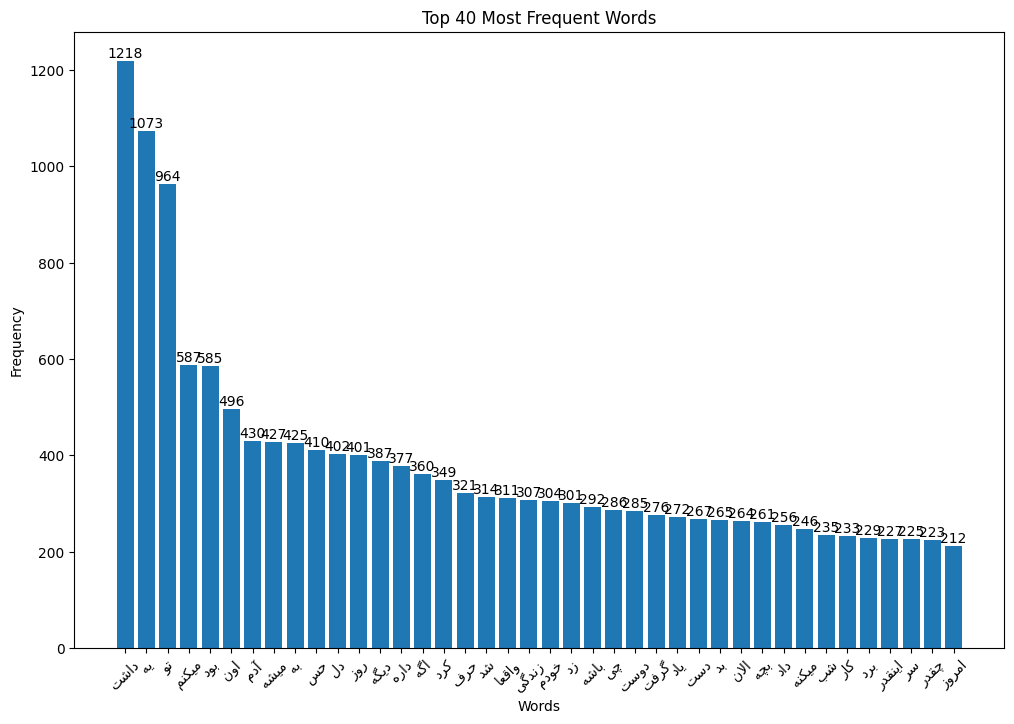

In [12]:
combined_text = ' '.join(df['lemma_text'])

tokens = word_tokenize(combined_text)
word_freq = Counter(tokens)
top_words = word_freq.most_common(40)
words, frequencies = zip(*top_words)
persian_words = [get_display(reshape(word)) for word in words]

plt.figure(figsize=(12, 8))
plt.bar(persian_words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 40 Most Frequent Words')
plt.xticks(rotation=45)
for i, freq in enumerate(frequencies):
    plt.text(i, freq + 1, str(freq), ha='center', va='bottom', fontsize=10)
plt.show()

In [13]:
def get_ngrams(text_series, n):
    tokens = text_series.apply(word_tokenize)
    ngrams_list = tokens.apply(lambda x: list(ngrams(x, n)) if len(x) >= n else [])
    ngrams_flat = [ngram for sublist in ngrams_list for ngram in sublist]
    ngram_freq = Counter(ngrams_flat)  
    return ngram_freq

def plot_ngrams(ngram_freq, n, top_n=30):
    common_ngrams = ngram_freq.most_common(top_n)
    ngrams, freqs = zip(*common_ngrams) if common_ngrams else ([], [])
    ngram_labels = [' '.join(ngram) for ngram in ngrams]


    persian_ngram_labels = [get_display(reshape(label)) for label in ngram_labels]
    plt.figure(figsize=(15, 6))
    plt.bar(persian_ngram_labels, freqs)
    plt.title(f'Top {top_n} {n}-grams')
    plt.xlabel(f'{n}-grams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()


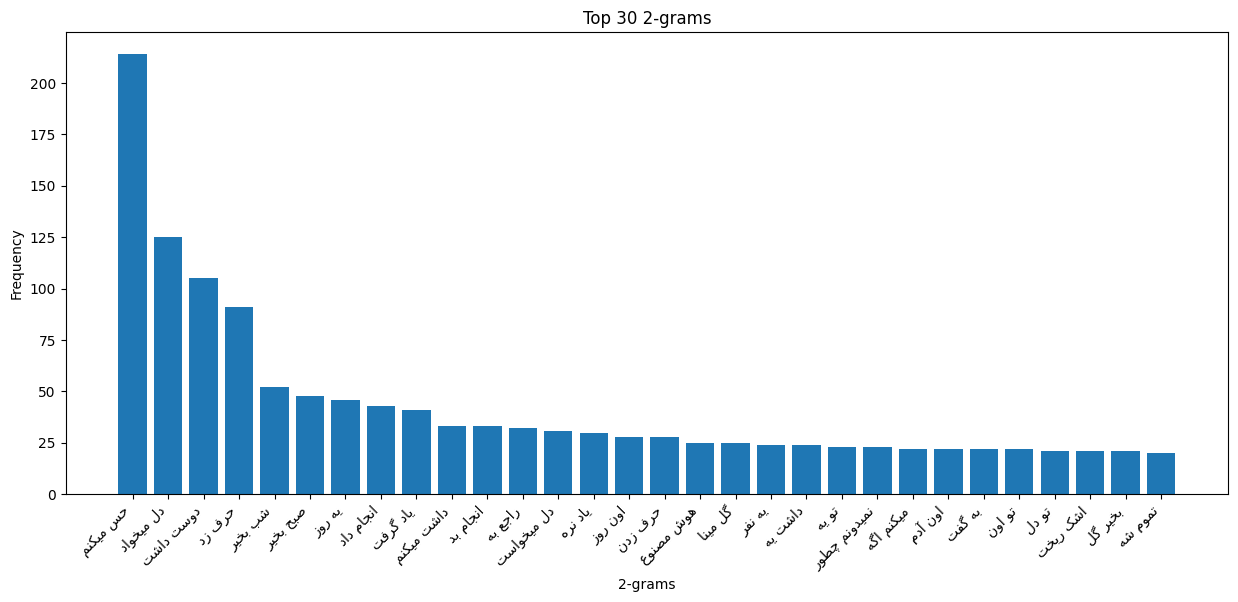

In [14]:
bigram_freq = get_ngrams(df['lemma_text'], 2)
plot_ngrams(bigram_freq, 2)

c:\Users\Mostafa\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44316 (\N{HANGUL SYLLABLE GWAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Mostafa\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52270 (\N{HANGUL SYLLABLE CANH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Mostafa\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Mostafa\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51656 (\N{HANGUL SYLLABLE JIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Mostafa\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pyl

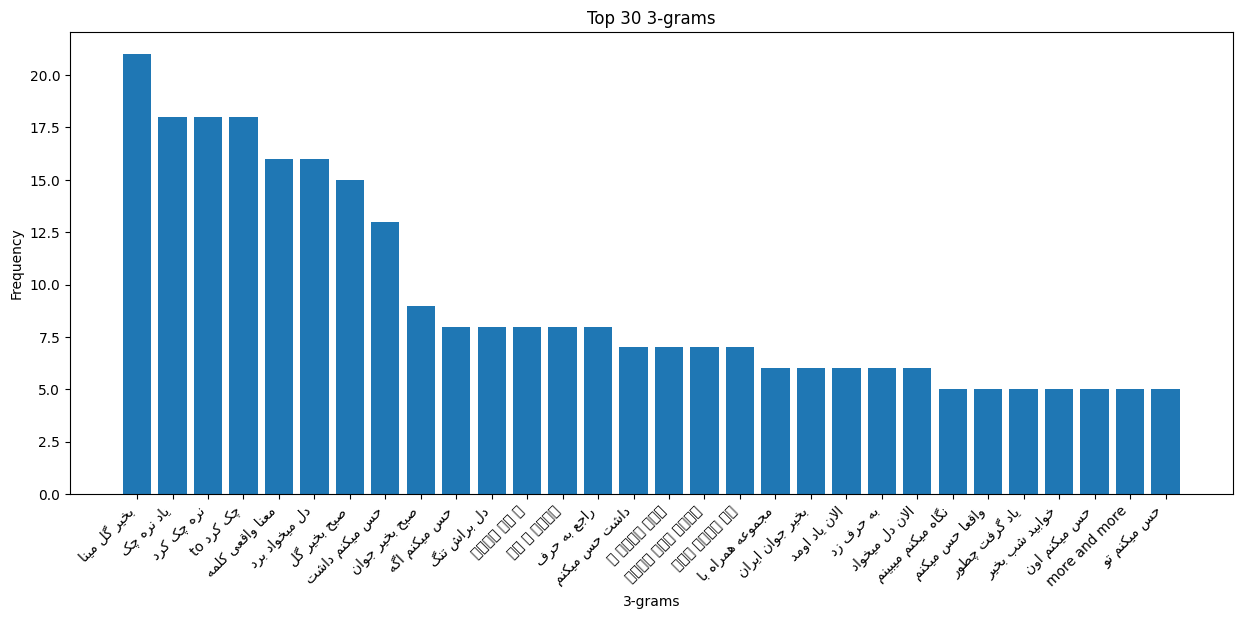

In [15]:
bigram_freq = get_ngrams(df['lemma_text'], 3)
plot_ngrams(bigram_freq, 3)